In [864]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
from numpy.linalg import matrix_power as mp
import matplotlib as mpl
from networkx.algorithms.community import greedy_modularity_communities as mod_com
from networkx.algorithms.community import performance
import scipy
from scipy.cluster import hierarchy
import itertools
from networkx.algorithms.community import girvan_newman
from networkx.algorithms.components import number_connected_components
import scipy as sp
import matplotlib.pyplot as plt
import sympy as sym
import pandas
from sympy import zeros
from matplotlib import collections  as mc
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import dionysus as d
import csv
from matplotlib.text import TextPath
from scipy import stats
import matplotlib.patches as patches
import time
from statistics import mean
from itertools import chain, combinations
import operator
import copy

#20 visually distinct colors
color_list=['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6',
            '#bfef45', '#fabebe', '#469990', '#e6beff', '#9A6324', '#fffac8', '#800000', '#aaffc3',
            '#808000', '#ffd8b1', '#e60075', '#a9a9a9', '#ffffff']

# Jerome Roehm Summer 2019 Rat Brain Replay/Preplay

In [1098]:
# given a list of sequences (lists), reduce it to pairwise intersection information as an adjacency matrix
# minimum of sequence should be one and should not omit any numbers from 1 to max(seq)
    #this could be fixed later

def reduce_to_adj(seqs):
    largest=0
    for seq in seqs:
        m=max(seq)
        if m>largest:
            largest=m
    adj_mtx=np.zeros((largest,largest))
    for seq in seqs:
        for i in range(len(seq)-1):
            adj_mtx[seq[i]-1,seq[i+1]-1]=1
    adj_mtx=adj_mtx+adj_mtx.T
    for i in range(largest):
        for j in range(largest):
            if i==j:
                adj_mtx[i,j]=0
            if adj_mtx[i,j] != 0:
                adj_mtx[i,j]=1
    return adj_mtx

In [1089]:
# reduce sequences to an adjacency matrix and also output a list corresponging to the node labels
def reduce_seqs_smart(seqs):
    nodes_set=set()
    for seq in seqs:
        for n in seq:
            nodes_set.add(n)
    nodes=list(nodes_set)
    nodes.sort()
    num_nodes=len(nodes)
    adj_mtx=np.zeros((num_nodes,num_nodes))
    for seq in seqs:
        for i in range(len(seq)-1):
            adj_mtx[nodes.index(seq[i]),nodes.index(seq[i+1])]=1
    adj_mtx=adj_mtx+adj_mtx.T
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i==j:
                adj_mtx[i,j]=0
            elif adj_mtx[i,j] != 0:
                adj_mtx[i,j]=1
    return adj_mtx, nodes

In [1090]:
# show the adjacency matrix of a sequence
def show_adj(seqs):
    mtx,labels=reduce_seqs_smart(seqs)
    df = pandas.DataFrame(mtx, columns=labels, index=labels)
    return df

In [1204]:
# examples
ex_0=[[0,1,2,0]]
ex_1=[[3,3,4,2,3],[3,3,3,5,2],[1,4,2,3,1],[2,3,3,3,1]]
ex_2=[[5,3,4,5,5],[4,5,3,1,4],[1,3,5,5,5],[5,5,4,1,2],[1,3,5,5,1],[4,2,3,4,3]]
ex_3=[[9,8,3,206,3,9,-7,16,51,-7]]
ex_4=[[1,2,1,3,1,4,1,5,1,6]]
examples=[ex_0,ex_1,ex_2,ex_3,ex_4]
print(reduce_to_adj(ex_1))
show_adj(ex_3)

[[0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [1. 1. 0. 1. 1.]
 [1. 1. 1. 0. 0.]
 [0. 1. 1. 0. 0.]]


,-7,3,8,9,16,51,206
-7,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0
8,0.0,1.0,0.0,1.0,0.0,0.0,0.0
9,1.0,1.0,1.0,0.0,0.0,0.0,0.0
16,1.0,0.0,0.0,0.0,0.0,1.0,0.0
51,1.0,0.0,0.0,0.0,1.0,0.0,0.0
206,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [1199]:
# reduces data in the form of sequences, adjacency matrix, or graph
def data_to_graph(data):
    if type(data)==list:
        adj_mtx,node_labels=reduce_seqs_smart(data)
        G=nx.from_numpy_matrix(adj_mtx)
    elif type(data)==np.ndarray:
        adj_mtx=data.copy()
        node_labels=list(range(adj_mtx.shape[0]))
        G=nx.from_numpy_matrix(adj_mtx)
    elif type(data)==type(nx.complete_graph(1)):
        return data
    labels={}
    for i in range(len(node_labels)):
        labels[i]=node_labels[i]
    G=nx.relabel_nodes(G,labels)
    return G

In [1140]:
#Reduces data to adjacency matrix
def data_to_adj(data):
    if type(data)==list:
        adj_mtx,trash=reduce_seqs_smart(data)
    elif type(data)==np.ndarray:
        adj_mtx=data.copy()
    elif type(data)==type(nx.complete_graph(1)):
        mtx=nx.adjacency_matrix(data)
        adj_mtx=np.array(mtx.todense())
    return adj_mtx

In [1202]:
# produces a simple 2d plot of the graph from sequences based on the networks spring layout
def graph(data):
    G=data_to_graph(data)
    plt.figure(figsize=(5,5))
    pos=nx.spring_layout(G)
    nx.draw_networkx_nodes(G,pos=pos,node_color='w',node_size=300,edgecolors='k',linewidths=0.2)
    nx.draw_networkx_edges(G,pos=pos,node_color='b')
    nx.draw_networkx_labels(G, pos, font_size=12)
    plt.axis('off')
    plt.axis('equal')
    plt.show()

Example 0


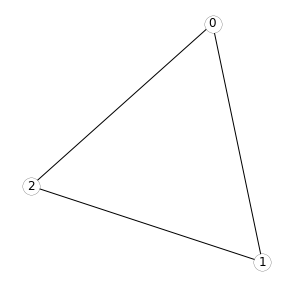

Example 1


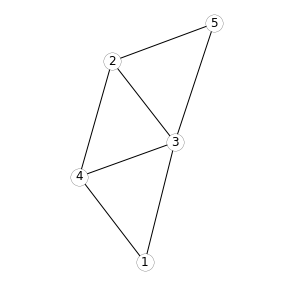

Example 2


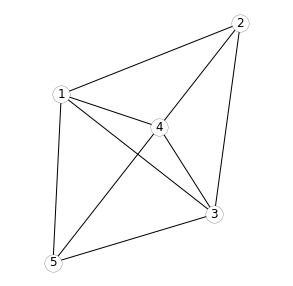

Example 3


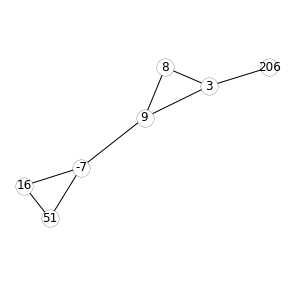

Example 4


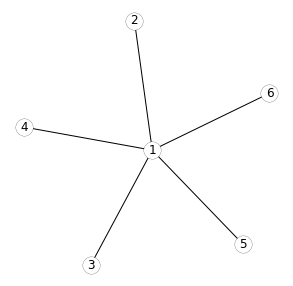

In [1205]:
# examples
for i in range(len(examples)):
    print('Example', i)
    graph(examples[i])

In [1112]:
# simple euclidean distance function
def dist(p1,p2):
    summ=0
    for c in range(len(p1)):
        summ=summ+(p1[c]-p2[c])**2
    summ=math.sqrt(summ)
    return summ

In [1141]:
# function testing if any radius will allow the sequence/graph to be constructed given a point cloud
def will_unif_rad_work(data,pt_cloud):
    adj_mtx=data_to_adj(data)
    shape=adj_mtx.shape[0]
    dists=list(scipy.spatial.distance.pdist(pt_cloud))
    dists.sort()
    if np.array_equal(adj_mtx,np.zeros((shape,shape))): #if graph is empty, trivial
        return dists[0]/2
    for d in dists:
        flag=0
        for i in range(shape):
            for j in range(i+1,shape):
                if flag==0:
                    dis=dist(pt_cloud[i,:],pt_cloud[j,:])
                    if adj_mtx[i,j]==1 and dis>d: #if two nodes should be connected but isn't
                        flag=1
                    if adj_mtx[i,j]==0 and dis<=d: #if two nodes should not be connected but are
                        flag=1
        if flag==0:
            return d/2 #returns smallest radius that works
    return False

In [1208]:
#function graphs the networkx spring layout and tests if any radius will allow it to be constructed
    # if it can be constructed it makes pretty colored picture, if not, black and white
def graph_with_unif_rad(data):
    G=data_to_graph(data)
    plt.figure(figsize=(7,7))
    pos=nx.spring_layout(G)
    nx.draw_networkx_nodes(G,pos=pos,node_color='w',node_size=300)
    nx.draw_networkx_edges(G,pos=pos,node_color='b')
    nx.draw_networkx_labels(G, pos, font_size=14)
    plt.axis('equal')
    pt_cloud=np.zeros((0,2))
    for i in list(G):
        pt_cloud=np.vstack((pt_cloud,pos[i]))
    r=will_unif_rad_work(G,pt_cloud)
    if r==False:
        plt.show()
        return False
    x_list=list(pt_cloud[:,0])
    y_list=list(pt_cloud[:,1])
    for i in range(len(x_list)):
        plt.plot(x_list[i],y_list[i],marker='o',markersize=20,color=color_list[i%20],alpha=0.5)
    ax=plt.gca()
    for i in range(len(x_list)):
        c=plt.Circle((x_list[i],y_list[i]), r,color=color_list[i%20], fill=False)
        ax.add_artist(c)
    plt.axis('on')
    plt.show()

Example 0


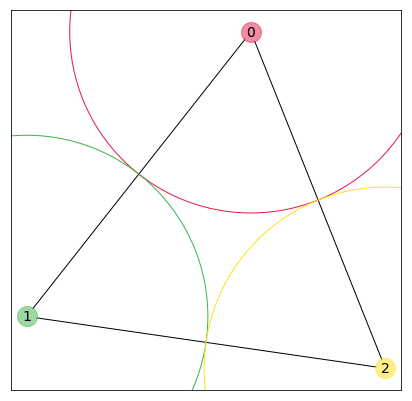

Example 1


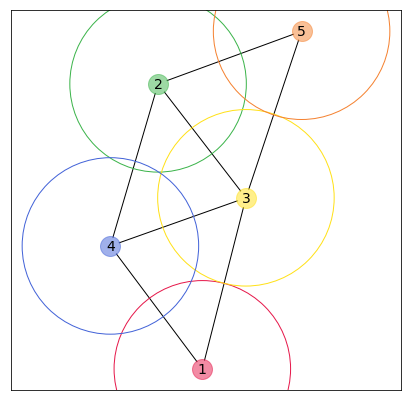

Example 2


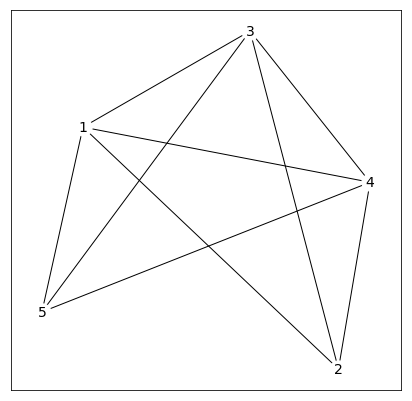

Example 3


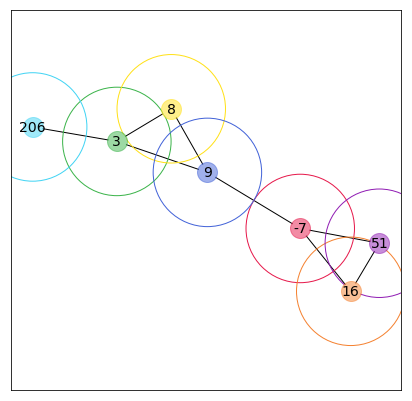

Example 4


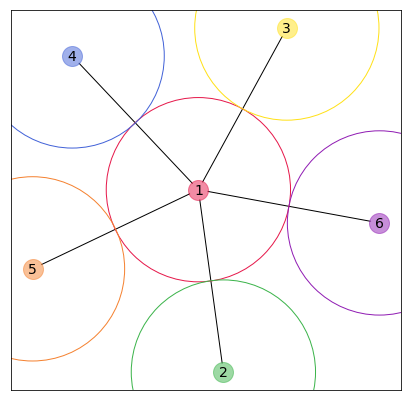

In [1209]:
# examples
for i in range(len(examples)):
    print('Example', i)
    graph_with_unif_rad(examples[i])

[[6, 2, 6, 5], [5, 1, 5, 1, 7, 7, 8], [2, 5, 8, 2, 7, 9, 2, 3, 3], [5, 2, 3, 6, 5, 2, 8, 7]]


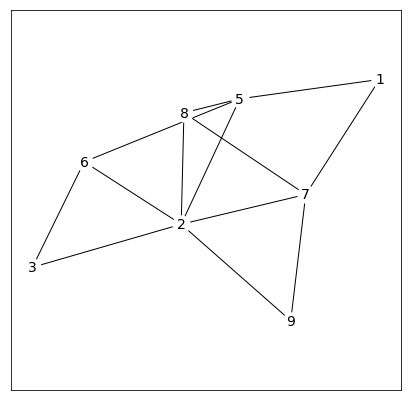

[[1, 5, 3, 5, 4], [5, 4, 8, 7, 4, 7], [9, 1, 1, 3, 7], [5, 1, 6, 3]]


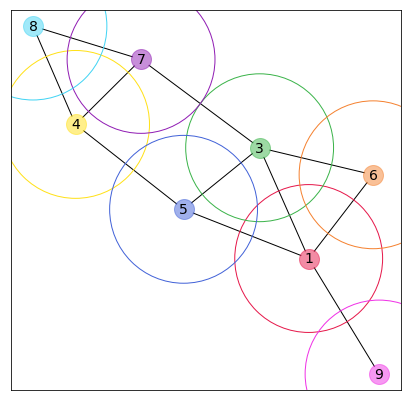

In [1139]:
# more examples with some random sequences
rand_seqs1=[]
for i in range(4):
    seq_length=np.random.randint(4,10)
    seq=list(np.random.randint(1,10,size=seq_length))
    rand_seqs1.append(seq)
print(rand_seqs1)
graph_with_unif_rad(rand_seqs1)

rand_seqs2=[]
for i in range(4):
    seq_length=np.random.randint(4,10)
    seq=list(np.random.randint(1,10,size=seq_length))
    rand_seqs2.append(seq)
print(rand_seqs2)
graph_with_unif_rad(rand_seqs2)

In [1158]:
# This function creates and tries random point clouds in a given dimension
    # for given data. Patience paramenter is how long (in seconds) it tries before giving up
def try_random_pt_clouds(data,dim,return_cloud=False,patience=10,fancy=False):
    adj_mtx=data_to_adj(data)
    start=time.time()
    cur_time=time.time()
    found=False
    tries=0
    shape=adj_mtx.shape[0]
    while cur_time-start<patience and found==False:
        tries+=1
        pt_cloud=np.random.rand(shape,dim)
        r=will_unif_rad_work(adj_mtx,pt_cloud)
        if r>0:
            found=True
        cur_time=time.time()
    if found==False:
        if fancy:
            print('Tried %i times in %i dimensions and got nothing, sorry :(' %(tries,dim))
        if return_cloud:
            return False, None
        else:
            return False
    if found==True:
        if fancy:
            print('Found successfully in %i dimensions on %i tries in %.1f seconds' %(dim,tries,time.time()-start))
        if return_cloud and fancy==False:
            return True, pt_cloud
        if return_cloud==False and fancy==False:
            return True
    if fancy and found:
        if dim<=2:
            x_list=list(pt_cloud[:,0])
            if dim==1:
                y_list=[0]*len(x_list)
            else:
                y_list=list(pt_cloud[:,1])
            plt.figure(figsize=(5,5))
            plt.axis('equal')
            if type(data)==list:
                trash,labels=reduce_seqs_smart(data)
            else:
                labels={}
                for i in range(shape):
                    labels[i]=i
            for i in range(len(x_list)):
                plt.plot(x_list[i],y_list[i],marker=TextPath((-4,-2), str(labels[i])),markersize=20,color=color_list[i%20],label=i+1)
            ax=plt.gca()
            for i in range(len(x_list)):
                c=plt.Circle((x_list[i],y_list[i]), r,color=color_list[i%20], fill=True, alpha=0.05)
                ax.add_artist(c)
                c=plt.Circle((x_list[i],y_list[i]), r,color=color_list[i%20], fill=False)
                ax.add_artist(c)
            for i in range(adj_mtx.shape[0]):
                for j in range(adj_mtx.shape[0]):
                    if adj_mtx[i,j]==1:
                        plt.plot([x_list[i],x_list[j]],[y_list[i],y_list[j]],alpha=0.1,color='k')
            plt.show()
            if return_cloud:
                return True, pt_cloud
            else:
                return True

Example 0
Found successfully in 2 dimensions on 1 tries in 0.0 seconds


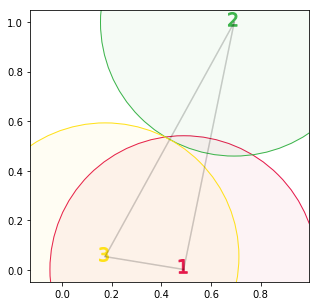

Example 1
Found successfully in 2 dimensions on 20 tries in 0.0 seconds


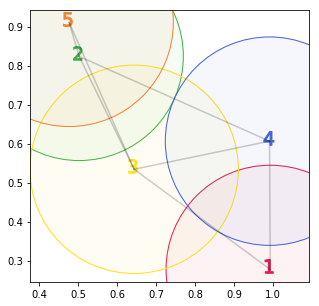

Example 2
Found successfully in 2 dimensions on 2 tries in 0.0 seconds


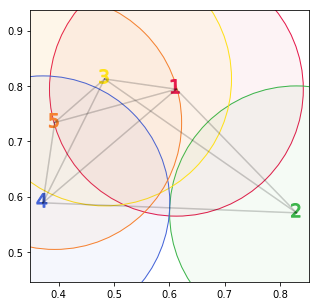

Example 3
Found successfully in 2 dimensions on 1533 tries in 0.7 seconds


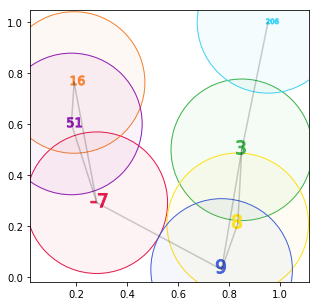

Example 4
Tried 26379 times in 2 dimensions and got nothing, sorry :(


In [1159]:
# examples
for i in range(len(examples)):
    print('Example', i)
    try_random_pt_clouds(examples[i],dim=2,patience=10,fancy=True)

This shows randomizing (at least in two dimensions) isn't very effective for finding characterizations/solutions. It's a bit better at one dimension with small sequences

#### Investigating sequences that are impossible in some dimensions:

##### Kissing Number Test

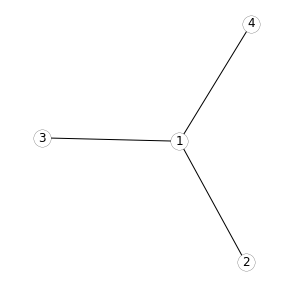

Tried 71863 times in 1 dimensions and got nothing, sorry :(
Found successfully in 2 dimensions on 13 tries in 0.0 seconds


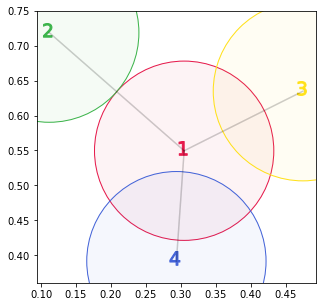

True

In [1167]:
#The following investigates using the 'Kissing Number'

#a graph with central node with 3 unconnected neighbors is impossible in R1
impossible_R1_seq=[[1,2,1,3,1,4]]
graph(impossible_R1_seq)
try_random_pt_clouds(impossible_R1_seq,dim=1,fancy=True)
try_random_pt_clouds(impossible_R1_seq,dim=2,fancy=True)

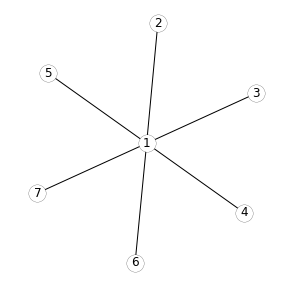

Tried 18478 times in 2 dimensions and got nothing, sorry :(
Tried 15806 times in 3 dimensions and got nothing, sorry :(


False

In [1168]:
#a graph with a central node with 6 unconnected neighbors is imporrible in R2
impossible_R2_seq=[[1,2,1,3,1,4,1,5,1,6,1,7]]
graph(impossible_R2_seq)
try_random_pt_clouds(impossible_R2_seq,dim=2,fancy=True)
try_random_pt_clouds(impossible_R2_seq,dim=3,fancy=True)

In [1210]:
# just to show this sequence will work in R3, this construction will work with r=0.5
construction=np.array([[0,0,0],[1,0,0],[-1,0,0],[0,1,0],[0,-1,0],[0,0,1],[0,0,-1]])
will_unif_rad_work(impossible_R2_seq,construction)

0.5

Now to create a function that can rule out a sequence for having a central node and too many nodes connected to it without being connected themselves. Note that in the one-dimensional case, if a 3-clique has 3 unconnected neighbors, it also fails the test.

First, we create a function that can condense nodes "on top" of each other if they are connected and have all the same neighbors.

In [1211]:
def condense_nodes(Graph,return_dict=False):
    G=Graph.copy()
    nodes=list(G)
    nodes.sort()
    condensed_list=nodes.copy()
    if return_dict:
        absorbed_dict={}
    for n1 in nodes:
        identical_to_n1=[]
        l2=list(G.neighbors(n1))
        l2.sort()
        for n2 in l2:
            if n2>n1:
                n1_neigh=list(G.neighbors(n1))
                n1_neigh.remove(n2)
                n2_neigh=list(G.neighbors(n2))
                n2_neigh.remove(n1)
                if n1_neigh==n2_neigh:
                    identical_to_n1.append(n2)
        for n in identical_to_n1:
            if n in condensed_list:
                condensed_list.remove(n)
                if return_dict:
                    absorbed_dict.update({n:n1})
    for n in list(G.nodes()):
        if n not in condensed_list:
            G.remove_node(n)
    if return_dict:
        return G, absorbed_dict
    else:
        return G

Example 0


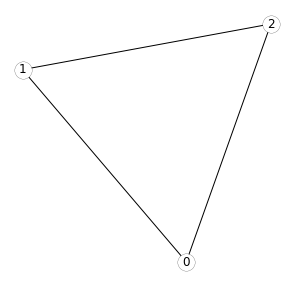

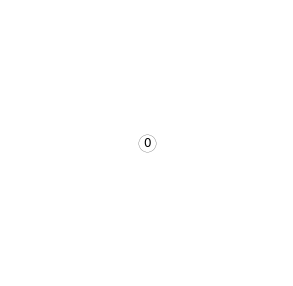

Note that node 1 was absorbed into node 0
Note that node 2 was absorbed into node 0

Example 1


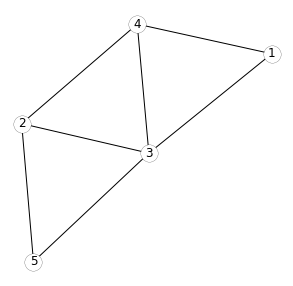

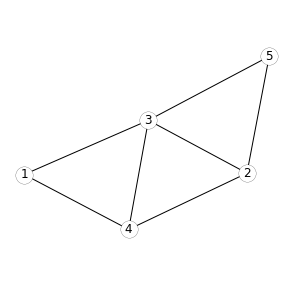


Example 2


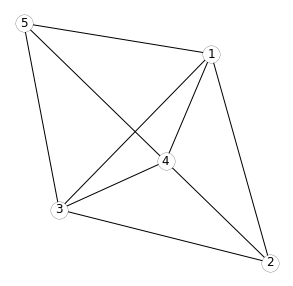

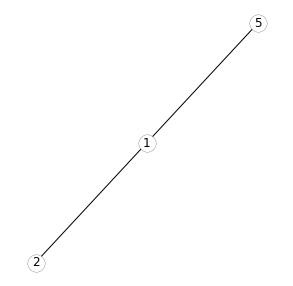

Note that node 3 was absorbed into node 1
Note that node 4 was absorbed into node 1

Example 3


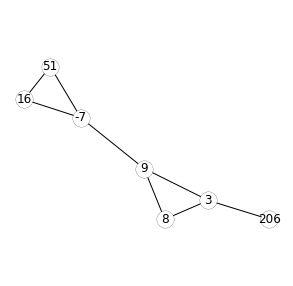

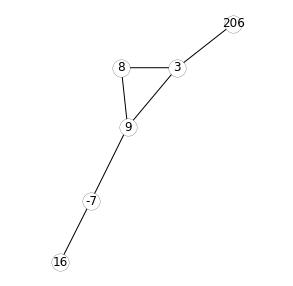

Note that node 51 was absorbed into node 16

Example 4


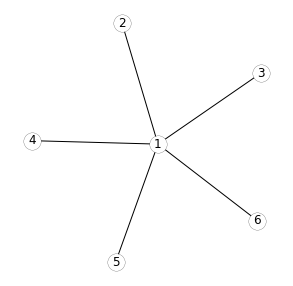

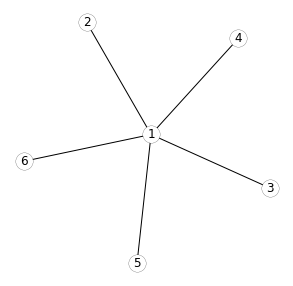

In [1218]:
# examples of condensing
for i in range(len(examples)):
    print('Example', i)
    graph(examples[i])
    G=data_to_graph(examples[i])
    condensed_G,dic=condense_nodes(G,return_dict=True)
    graph(condensed_G)
    for n in list(dic.keys()):
        print('Note that node %i was absorbed into node %i' %(n,dic[n]))
    plt.show()
    print()

In [1224]:
# this is the kissing test for one dimension.
def kiss_test_1(data,prt=False):
    G=data_to_graph(data)
    G=condense_nodes(G)
    three_or_one_cliques=[]
    for c in nx.enumerate_all_cliques(G):
        if len(c)==3 or len(c)==1:
            three_or_one_cliques.append(c)
    for c3 in three_or_one_cliques:
        c3_neighbors=set([])
        for n in c3:
            c3_neighbors=c3_neighbors.union(set(list(G.neighbors(n))))
        for n in c3:
            if n in c3_neighbors:
                c3_neighbors.remove(n)
        if len(c3_neighbors)>=3:
            for s in combinations(c3_neighbors,3):
                flag=0
                for p in s:
                    for q in s:
                        if flag==0:
                            if G.has_edge(p,q):
                                flag=1
                if flag==0:
                    if prt:
                        print('Clique',list(c3),'is connected to nodes',list(s),'none of which are connected to each other')
                    return False
    return True

In [1225]:
# examples
for i in range(len(examples)):
    print('Example',i)
    print(kiss_test_1(examples[i],prt=True))

Example 0
True
Example 1
True
Example 2
True
Example 3
True
Example 4
Clique [1] is connected to nodes [2, 3, 4] none of which are connected to each other
False


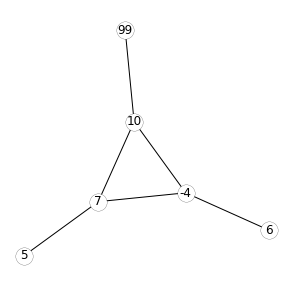

Clique [-4, 7, 10] is connected to nodes [99, 5, 6] none of which are connected to each other
False


In [1226]:
# interesting example
new_example=[[5,7,-4,6,-4,10,7,10,99]]
graph(new_example)
print(kiss_test_1(new_example,prt=True))

In [1228]:
# This is the kissing test generalizable to higher dimensions on a single node
    # it doesn't handle node labels correctly, but I'll fix that if I need it later.
def single_central_test(seqs,dim,data='seq',prt=False):
    kissing_numbers=[0,3,6,12,24,40,72,126,240]
    kiss_num=kissing_numbers[dim]
    if type(seqs)==list:
        mtx=reduce_to_adj(seqs)
    if type(seqs)==np.ndarray:
        mtx=seqs.copy()
    num_nodes=mtx.shape[0]
    row_sums=np.sum(mtx,axis=1)
    for i in range(num_nodes):
        if row_sums[i]>=kiss_num:
            connected_to_i=[]
            for j in range(num_nodes):
                if mtx[i,j]==1:
                    connected_to_i.append(j)
            for s in combinations(connected_to_i,kiss_num):
                falsify=True
                for p in s:
                    for q in s:
                        if falsify:
                            if mtx[p,q]==1:
                                falsify=False
                if falsify:
                    if prt:
                        sp1=[x+1 for x in s]
                        print('Node',i+1,'is connected to nodes',sp1,'none of which are connected to each other')
                    return False
    return True

The following investigates the frequency with which the kissing test (one node) can rule out random sequences depending on the number of nodes in the sequence, the length of the sequence, and the dimension.

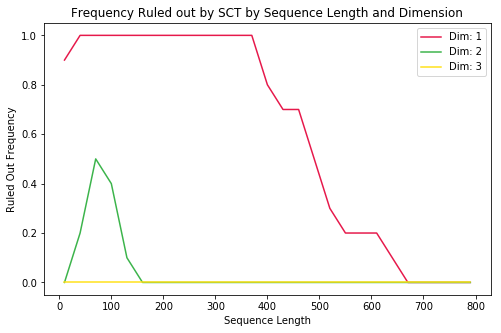

Execution time: 312.37314534187317 seconds


In [606]:
#This cell plots the frequency with which the single central test can rule out sequences on (20 neurons)
# as a function of sequence length for dimensions one, two, and three
start=time.time()
trials=10
seq_lengths=list(range(10,801,30))
plt.figure(figsize=(8,5))
for dim in [1,2,3]:
    y_vals=[]
    for i in range(len(seq_lengths)):
        ruled_out=0
        for t in range(trials):
            rand_seq=[list(np.random.randint(1,20,size=seq_lengths[i]))]
            if single_central_test(rand_seq,dim)==False:
                ruled_out+=1
        y_vals.append(ruled_out/trials)
    plt.plot(seq_lengths,y_vals, color=color_list[dim-1],label='Dim: %i' %dim)
    plt.xlabel('Sequence Length')
    plt.ylabel('Ruled Out Frequency')
    plt.title('Frequency Ruled out by SCT by Sequence Length and Dimension')
    plt.legend()
plt.show()
end=time.time()
print('Execution time:',end-start,'seconds')

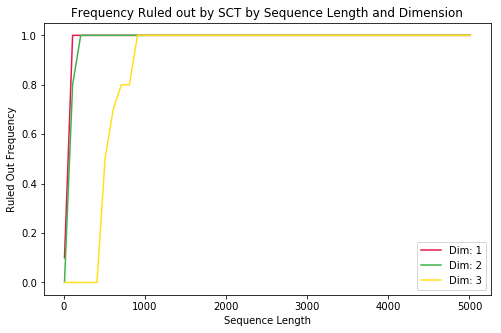

Execution time: 1661.2622480392456 seconds


In [609]:
#This cell plots the frequency with which the single central test can rule out sequences on (403 neurons)
# as a function of sequence length for dimensions one, two, and three
start=time.time()
trials=10
seq_lengths=list(range(10,5011,100))
plt.figure(figsize=(8,5))
for dim in [1,2,3]:
    y_vals=[]
    for i in range(len(seq_lengths)):
        ruled_out=0
        for t in range(trials):
            rand_seq=[list(np.random.randint(1,403,size=seq_lengths[i]))]
            if single_central_test(rand_seq,dim)==False:
                ruled_out+=1
        y_vals.append(ruled_out/trials)
    plt.plot(seq_lengths,y_vals, color=color_list[dim-1],label='Dim: %i' %dim)
    plt.xlabel('Sequence Length')
    plt.ylabel('Ruled Out Frequency')
    plt.title('Frequency Ruled out by SCT by Sequence Length and Dimension')
    plt.legend()
plt.show()
end=time.time()
print('Execution time:',end-start,'seconds')

##### Impermissible Cycles Test

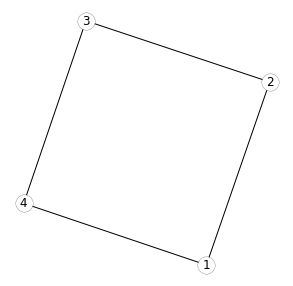

Tried 78294 times in 1 dimensions and got nothing, sorry :(


False

In [1232]:
# The following investigates using cycles and homology in R1
cycle_example=[[1,2,3,4,1]]
graph(cycle_example)
try_random_pt_clouds(cycle_example,dim=1,fancy=True)

In [1230]:
#Function tests for impermissible "loops"
def impermissible_cycles_R1(data,prt=False):
    G=data_to_graph(data)
    G=condense_nodes(G)
    cycles=nx.simple_cycles(G.to_directed())
    cliques=list(nx.enumerate_all_cliques(G))
    for c in cycles:
        sortd=c.copy()
        sortd.sort()
        if len(c)>3 and sortd not in cliques:
            flag=0
            for n1 in list(c):
                for n2 in list(c):
                    if flag==0:
                        if G.has_edge(n1,n2):
                            for n3 in list(c):
                                if flag==0 and n2!=n3 and G.has_edge(n1,n3):
                                    for n4 in list(c):
                                        if flag==0 and n4!=n2 and n4!=n3 and G.has_edge(n1,n4):
                                            flag=1
            if flag==0:
                if prt:
                    print(list(c), 'forms an impermissible cycle')
                return False
    return True

In [1236]:
# examples
print('Cycle Example')
impermissible_cycles_R1(cycle_example,prt=True)
for i in range(len(examples)):
    print('Example', i)
    print(impermissible_cycles_R1(examples[i],prt=True))

Cycle Example
[1, 4, 3, 2] forms an impermissible cycle
Example 0
True
Example 1
True
Example 2
True
Example 3
True
Example 4
True


#### Systematic approach for sequences in R1
After thinking and constructing examples, I believe that these two tests provide a complete characterization of sequences that are constructable in R1. I now move to a systematic way of investigating rather than a 'random' one.

# This is where I left off at 2:15

In [198]:
#make a function that creates a list of all possible adjacency matrices
def make_adjs(n):
    adj_list=[]
    indices=np.triu_indices(n,k=1)
    for i in range(int(2**((n**2-n)/2))):
        mtx=np.zeros((n,n))
        binary='{0:b}'.format(i)
        for p in range(1,len(binary)+1):
            mtx[indices[0][p-1],indices[1][p-1]]=binary[-p]
        adj_list.append(mtx+mtx.T)
    return adj_list

In [258]:
start=time.time()
nodes=6
patience=0.4
cy=0
kiss=0
either=0
uncaught_list=[]
cy_errors=[]
kiss_errors=[]
trials=int(2**((nodes**2-nodes)/2))
mtx_list=make_adjs(nodes)
third=False
two_third=False
for ind in range(len(mtx_list)):
    m=mtx_list[ind]
    cy_test=impermissible_cycles_R1(m)
    kiss_test=single_central_test(m,dim=1)
    if cy_test==False:
        cy+=1
        if try_random_pt_clouds(m,dim=1,return_cloud=False,patience=0.05,fancy=False)==True:
            cy_errors.append(m)
    if kiss_test==False:
        kiss+=1
        if try_random_pt_clouds(m,dim=1,return_cloud=False,patience=0.05,fancy=False)==True:
            kiss_errors.append(m)
    if cy_test==False or kiss_test==False:
        either+=1
    if cy_test and kiss_test:
        if try_random_pt_clouds(m,dim=1,return_cloud=False,patience=patience,fancy=False)==False:
            uncaught_list.append(m)
    
    if ind/trials>1/3 and third==False:
        print('One third complete in %.2f minutes' %((time.time()-start)/60))
        third=True
    if ind/trials>2/3 and two_third==False:
        print('Two thirds complete in %.2f minutes' %((time.time()-start)/60))
        two_third=True
print('Impermissible Cycles Test in R1 ruled out %.1f percent of %i trials' %((cy/trials*100),trials))
print('Kissing number Test in R1 ruled out %.1f percent of trials' %(kiss/trials*100))
print('Both Tests in R1 ruled out %.1f percent of trials' %(either/trials*100))
print('Potential Uncaught:',len(uncaught_list))
print('Cycle Test Errors:',len(cy_errors))
print('Kissing Test Errors:',len(kiss_errors))
stop=time.time()
print('Execution Time: %.2f minutes' %((stop-start)/60))

One third complete in 25.69 minutes
Two thirds complete in 49.09 minutes
Impermissible Cycles Test in R1 ruled out 44.6 percent of 32768 trials
Kissing number Test in R1 ruled out 53.4 percent of trials
Both Tests in R1 ruled out 69.8 percent of trials
Potential Uncaught: 4467
Cycle Test Errors: 0
Kissing Test Errors: 0
Execution Time: 69.79 minutes


In [378]:
unique_graphs=[]
for s in uncaught_list:
    G=nx.from_numpy_matrix(s)
    if nx.is_connected(G):
        flag=0
        for ug in unique_graphs:
            if nx.is_isomorphic(G,ug):
                flag=1
        if flag==0:
            unique_graphs.append(G)
print(len(unique_graphs))

21


In [404]:
round_2_uncaught=[]
for ug in unique_graphs:
    G=condense_nodes(ug)
    mtx=nx.adjacency_matrix(G)
    mtx=np.array(mtx.todense())
    if try_random_pt_clouds(mtx,dim=1,patience=10)==False:
        round_2_uncaught.append(mtx)
print(len(round_2_uncaught))

2


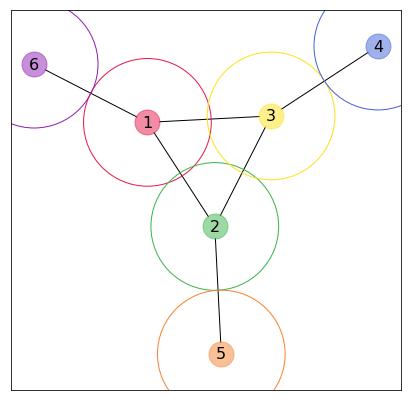

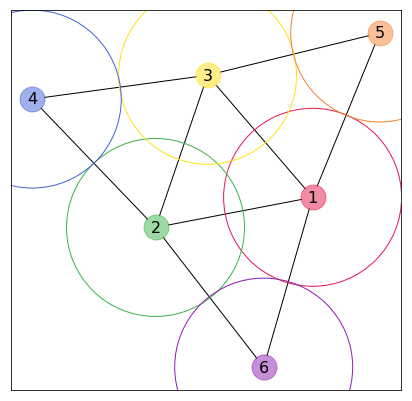

In [405]:
graph_with_unif_rad(round_2_uncaught[0])
graph_with_unif_rad(round_2_uncaught[1])

In [ ]:
#single nodes test
    for n in list(G.nodes()):
        n_neighbors=list(G.neighbors(n))
        if len(n_neighbors)>=3:
            for s in combinations(n_neighbors,3):
                flag=0
                for p in s:
                    for q in s:
                        if flag==0:
                            if G.has_edge(p,q):
                                flag=1
                if flag==0:
                    if prt:
                        sp1=[x+1 for x in s]
                        print('Node',n+1,'is connected to nodes',sp1,'none of which are connected to each other')
                    return False

In [505]:
kiss_test_1([[1,2,1,3,1,4]],prt=True)

Clique [1] is connected to nodes [2, 3, 4] none of which are connected to each other


False

In [478]:
G0=nx.from_numpy_matrix(round_2_uncaught[0])
G1=nx.from_numpy_matrix(round_2_uncaught[1])

Clique [1, 2, 3] is connected to nodes [4, 5, 6] none of which are connected to each other


False

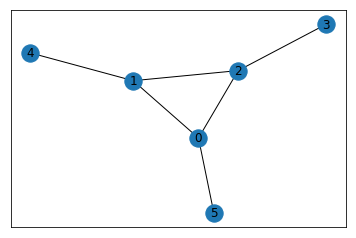

In [506]:
nx.draw_networkx(G0, with_labels=True)
kiss_test_1(G0,prt=True)

Clique [1, 2, 3] is connected to nodes [4, 5, 6] none of which are connected to each other


False

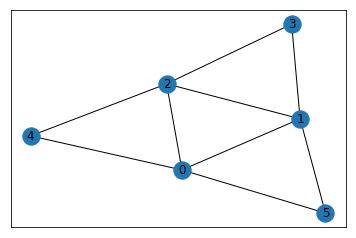

In [507]:
nx.draw_networkx(G1, with_labels=True)
kiss_test_1(G1,prt=True)

In [512]:
start=time.time()
nodes=5
patience=1
cy=0
kiss=0
either=0
uncaught_list=[]
cy_errors=[]
kiss_errors=[]
trials=int(2**((nodes**2-nodes)/2))
mtx_list=make_adjs(nodes)
third=False
two_third=False
for ind in range(len(mtx_list)):
    m=mtx_list[ind]
    cy_test=impermissible_cycles_R1(m)
    kiss_test=kiss_test_1(m)
    if cy_test==False:
        cy+=1
        if try_random_pt_clouds(m,dim=1,return_cloud=False,patience=0.05,fancy=False)==True:
            cy_errors.append(m)
    if kiss_test==False:
        kiss+=1
        if try_random_pt_clouds(m,dim=1,return_cloud=False,patience=0.05,fancy=False)==True:
            kiss_errors.append(m)
    if cy_test==False or kiss_test==False:
        either+=1
    if cy_test and kiss_test:
        if try_random_pt_clouds(m,dim=1,return_cloud=False,patience=patience,fancy=False)==False:
            uncaught_list.append(m)
    
    if ind/trials>1/3 and third==False:
        print('One third complete in %.2f minutes' %((time.time()-start)/60))
        third=True
    if ind/trials>2/3 and two_third==False:
        print('Two thirds complete in %.2f minutes' %((time.time()-start)/60))
        two_third=True
print('Impermissible Cycles Test in R1 ruled out %.1f percent of %i trials' %((cy/trials*100),trials))
print('Kissing number Test in R1 ruled out %.1f percent of trials' %(kiss/trials*100))
print('Both Tests in R1 ruled out %.1f percent of trials' %(either/trials*100))
print('Potential Uncaught:',len(uncaught_list))
print('Cycle Test Errors:',len(cy_errors))
print('Kissing Test Errors:',len(kiss_errors))
stop=time.time()
print('Execution Time: %.2f minutes' %((stop-start)/60))

One third complete in 0.23 minutes
Two thirds complete in 0.50 minutes
Impermissible Cycles Test in R1 ruled out 19.7 percent of 1024 trials
Kissing number Test in R1 ruled out 24.9 percent of trials
Both Tests in R1 ruled out 37.8 percent of trials
Potential Uncaught: 0
Cycle Test Errors: 0
Kissing Test Errors: 0
Execution Time: 0.74 minutes


### Create the unique (up to isomorphism) lists of graphs for n unique (no condensing possible) nodes

In [533]:
#-------n=4----------
mtx_list=make_adjs(4)
unique_connected_4_graphs=[]
for mtx in mtx_list:
    G=nx.from_numpy_matrix(mtx)
    if nx.is_connected(G):
        flag=0
        for ug in unique_connected_4_graphs:
            if flag==0:
                if nx.is_isomorphic(G,ug):
                    flag=1
        if flag==0:
            condensed_G=condense_nodes(G)
            if len(list(condensed_G.nodes()))==4:
                unique_connected_4_graphs.append(G)
print(len(unique_connected_4_graphs))

3


In [534]:
#-------n=5----------
mtx_list=make_adjs(5)
unique_connected_5_graphs=[]
for mtx in mtx_list:
    G=nx.from_numpy_matrix(mtx)
    if nx.is_connected(G):
        flag=0
        for ug in unique_connected_5_graphs:
            if flag==0:
                if nx.is_isomorphic(G,ug):
                    flag=1
        if flag==0:
            condensed_G=condense_nodes(G)
            if len(list(condensed_G.nodes()))==5:
                unique_connected_5_graphs.append(G)
print(len(unique_connected_5_graphs))

11


In [535]:
#-------n=6----------
start=time.time()
mtx_list=make_adjs(6)
unique_connected_6_graphs=[]
for mtx in mtx_list:
    G=nx.from_numpy_matrix(mtx)
    if nx.is_connected(G):
        flag=0
        for ug in unique_connected_6_graphs:
            if flag==0:
                if nx.is_isomorphic(G,ug):
                    flag=1
        if flag==0:
            condensed_G=condense_nodes(G)
            if len(list(condensed_G.nodes()))==6:
                unique_connected_6_graphs.append(G)
print(len(unique_connected_6_graphs))
stop=time.time()
print('Execution Time: %.2f minutes' %((stop-start)/60))

61
Execution Time: 0.99 minutes


In [536]:
#-------n=7----------
start=time.time()
mtx_list=make_adjs(7)
unique_connected_7_graphs=[]
for mtx in mtx_list:
    G=nx.from_numpy_matrix(mtx)
    if nx.is_connected(G):
        flag=0
        for ug in unique_connected_7_graphs:
            if flag==0:
                if nx.is_isomorphic(G,ug):
                    flag=1
        if flag==0:
            condensed_G=condense_nodes(G)
            if len(list(condensed_G.nodes()))==7:
                unique_connected_7_graphs.append(G)
print(len(unique_connected_7_graphs))
stop=time.time()
print('Execution Time: %.2f minutes' %((stop-start)/60))

507
Execution Time: 443.98 minutes


In [539]:
unique_connected_n_graphs=[0,1,2,3,unique_connected_4_graphs,unique_connected_5_graphs,
                          unique_connected_6_graphs,unique_connected_7_graphs]

In [540]:
def exaustive_check_r1(nodes,short_p=0.1,long_p=2):
    start=time.time()
    cy=0
    kiss=0
    either=0
    uncaught_list=[]
    cy_errors=[]
    kiss_errors=[]
    graphs_to_try=unique_connected_n_graphs[nodes]
    trials=len(graphs_to_try)
    tenth=False
    half=False
    for ind in range(trials):
        G=graphs_to_try[ind]
        cy_test=impermissible_cycles_R1(G)
        kiss_test=kiss_test_1(G)
        if cy_test==False:
            cy+=1
            if try_random_pt_clouds(G,dim=1,patience=short_p)==True:
                cy_errors.append(G)
        if kiss_test==False:
            kiss+=1
            if try_random_pt_clouds(G,dim=1,patience=short_p)==True:
                kiss_errors.append(G)
        if cy_test==False or kiss_test==False:
            either+=1
        if cy_test and kiss_test:
            if try_random_pt_clouds(G,dim=1,patience=long_p)==False:
                uncaught_list.append(G)

        if ind/trials>1/10 and tenth==False:
            print('One tenth complete in %.2f minutes' %((time.time()-start)/60))
            tenth=True
        if ind/trials>0.5 and half==False:
            print('Half complete in %.2f minutes' %((time.time()-start)/60))
            half=True
    print('Impermissible Cycles Test in R1 ruled out %.1f percent of %i trials' %((cy/trials*100),trials))
    print('Kissing number Test in R1 ruled out %.1f percent of trials' %(kiss/trials*100))
    print('Both Tests in R1 ruled out %.1f percent of trials' %(either/trials*100))
    print('Potential Uncaught:',len(uncaught_list))
    print('Cycle Test Errors:',len(cy_errors))
    print('Kissing Test Errors:',len(kiss_errors))
    stop=time.time()
    print('Execution Time: %.2f minutes' %((stop-start)/60))
    print('Returning: uncaught_list,cy_errors,kiss_errors')
    return [uncaught_list,cy_errors,kiss_errors]

In [548]:
e4_list=exaustive_check_r1(4)

One tenth complete in 0.00 minutes
Half complete in 0.00 minutes
Impermissible Cycles Test in R1 ruled out 33.3 percent of 3 trials
Kissing number Test in R1 ruled out 33.3 percent of trials
Both Tests in R1 ruled out 66.7 percent of trials
Potential Uncaught: 0
Cycle Test Errors: 0
Kissing Test Errors: 0
Execution Time: 0.00 minutes
Returning: uncaught_list,cy_errors,kiss_errors


In [549]:
e5_list=exaustive_check_r1(5)

One tenth complete in 0.00 minutes
Half complete in 0.02 minutes
Impermissible Cycles Test in R1 ruled out 45.5 percent of 11 trials
Kissing number Test in R1 ruled out 45.5 percent of trials
Both Tests in R1 ruled out 72.7 percent of trials
Potential Uncaught: 0
Cycle Test Errors: 0
Kissing Test Errors: 0
Execution Time: 0.02 minutes
Returning: uncaught_list,cy_errors,kiss_errors


In [551]:
e6_list=exaustive_check_r1(6,long_p=5)

One tenth complete in 0.02 minutes
Half complete in 0.08 minutes
Impermissible Cycles Test in R1 ruled out 63.9 percent of 61 trials
Kissing number Test in R1 ruled out 72.1 percent of trials
Both Tests in R1 ruled out 93.4 percent of trials
Potential Uncaught: 0
Cycle Test Errors: 0
Kissing Test Errors: 0
Execution Time: 0.15 minutes
Returning: uncaught_list,cy_errors,kiss_errors


In [552]:
e7_list=exaustive_check_r1(7,long_p=10)

One tenth complete in 0.12 minutes
Half complete in 1.68 minutes
Impermissible Cycles Test in R1 ruled out 79.7 percent of 507 trials
Kissing number Test in R1 ruled out 89.9 percent of trials
Both Tests in R1 ruled out 98.2 percent of trials
Potential Uncaught: 7
Cycle Test Errors: 0
Kissing Test Errors: 0
Execution Time: 2.77 minutes
Returning: uncaught_list,cy_errors,kiss_errors


HELP! 0


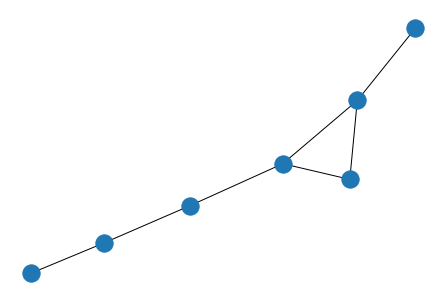

HELP! 1


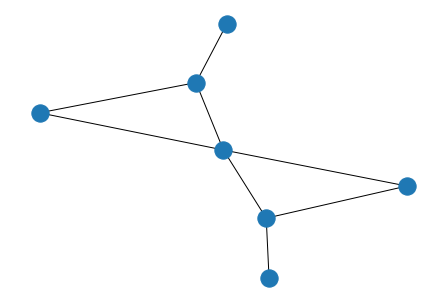

2 is not actually a problem.
HELP! 3


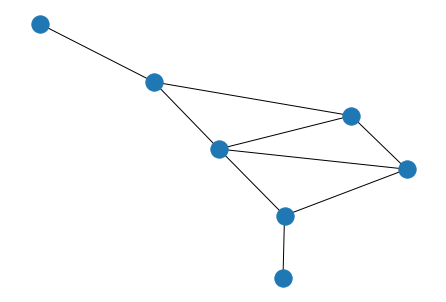

4 is not actually a problem.
5 is not actually a problem.
6 is not actually a problem.


In [566]:
for i in range(7):
    if try_random_pt_clouds(e7_list[0][i],dim=1,patience=30)==False:
        print('HELP!', i)
        nx.draw(e7_list[0][i])
        plt.show()
    else:
        print(i, 'is not actually a problem.')

By simple visual inspection, even the ones that require HELP! are easily constructable.

This computationally proves that the two tests, kissing test and impermissible cycles test is a complete characterization for the constructability of sequences of up to 7 nodes. For sequences with 8 nodes, computation becomes impractical.

maybe make a more efficienct try_random_pt_clouds based on the structure of the graph, flatten the spring layout?

maybe try to develop a systematic construction based on centrality? etc?

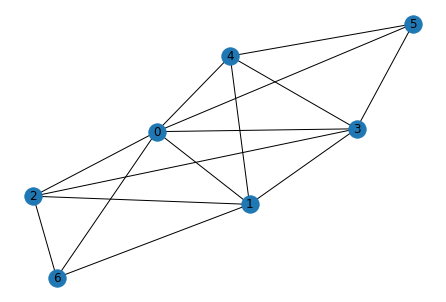

In [576]:
nx.draw(e7_list[0][6],with_labels=True)

In [642]:
def better_randomish_clouds_1(data,return_cloud=False,patience=10,fancy=False):
    start=time.time()
    if type(data)==list:
        mtx=reduce_to_adj(data)
        G=nx.from_numpy_matrix(mtx)
    if type(data)==np.ndarray:
        mtx=data.copy()
        G=nx.from_numpy_matrix(mtx)
    if type(data)==type(nx.complete_graph(1)):
        G=data.copy()
    G=condense_nodes(G)
    num_nodes=len(G.nodes())
    cur_time=time.time()
    found=False
    tries=0
    cent_dict=nx.betweenness_centrality(G)
    while cur_time-start<patience and found==False:
        tries+=1
        center_node=max(cent_dict.items(), key=operator.itemgetter(1))[0]
        pt_cloud=np.zeros((num_nodes,1))
        node_list=list(range(num_nodes))
        node_list.remove(center_node)
        for n in node_list:
            if G.has_edge(center_node,n):
                pt_cloud[n,0]=float(np.random.rand(1))*4-2
            else:
                rand=0
                while abs(rand)<2:
                    rand=float(np.random.rand(1))*num_nodes-num_nodes/2
                pt_cloud[n,0]=rand
        d=will_unif_rad_work(G,pt_cloud)
        if d>0:
            found=True
        cur_time=time.time()
    
    exc_time=time.time()-start
    if found==False:
        if fancy:
            print('Tried %i times in %.1f seconds and got nothing, sorry :(' %(tries,exc_time))
        if return_cloud:
            return False, None
        else:
            return False
    if found==True:
        if fancy:
            print('Found successfully in %i tries in %.1f seconds' %(tries,exc_time))
        if return_cloud and fancy==False:
            return True, pt_cloud
        if return_cloud==False and fancy==False:
            return True

In [ ]:
def better_random(data,return_cloud=False,patience=10,fancy=False):
    start=time.time()
    if type(data)==list:
        mtx=reduce_to_adj(data)
        G=nx.from_numpy_matrix(mtx)
    if type(data)==np.ndarray:
        mtx=data.copy()
        G=nx.from_numpy_matrix(mtx)
    if type(data)==type(nx.complete_graph(1)):
        G=data.copy()
    G=condense_nodes(G)
    num_nodes=len(G.nodes())
    cur_time=time.time()
    found=False
    tries=0
    cent_dict=nx.betweenness_centrality(G)
    center_node=max(cent_dict.items(), key=operator.itemgetter(1))[0]
    pt_cloud=np.zeros((num_nodes,1))
    node_list=list(range(num_nodes))
    node_list.remove(center_node)
    while cur_time-start<patience and found==False:
        tries+=1
        

14


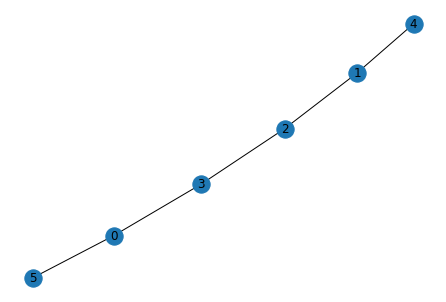

{0: 0.4, 1: 0.4, 2: 0.6000000000000001, 3: 0.6000000000000001, 4: 0.0, 5: 0.0}
16


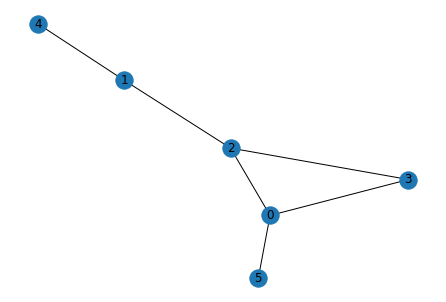

{0: 0.4, 1: 0.4, 2: 0.6000000000000001, 3: 0.0, 4: 0.0, 5: 0.0}
33


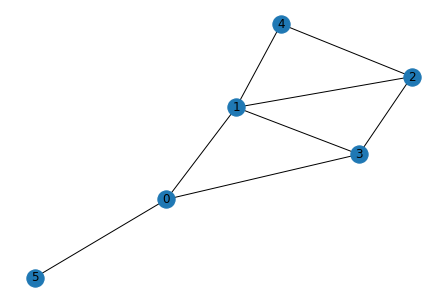

{0: 0.4, 1: 0.35000000000000003, 2: 0.05, 3: 0.1, 4: 0.0, 5: 0.0}
52


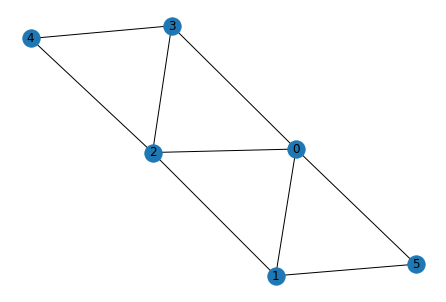

{0: 0.26666666666666666, 1: 0.08333333333333333, 2: 0.26666666666666666, 3: 0.08333333333333333, 4: 0.0, 5: 0.0}


In [679]:
for i in range(len(unique_connected_n_graphs[6])):
    G=unique_connected_n_graphs[6][i]
    if impermissible_cycles_R1(G) and kiss_test_1(G):
        print(i)
        nx.draw(G,with_labels=True)
        plt.show()
        c_dic=nx.betweenness_centrality(G)
        print(c_dic)
        end_counter=0
        for n in range(6):
            if c_dic[n]==0:
                end_counter+=1
        if end_counter<2:
            print('AHHHHHHHHHHHH!!!!!!!!',end_counter)

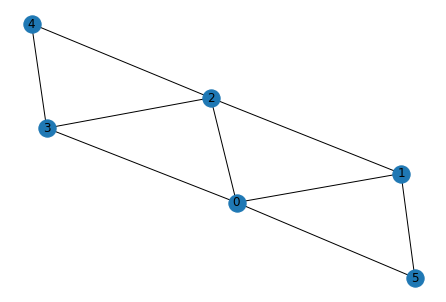

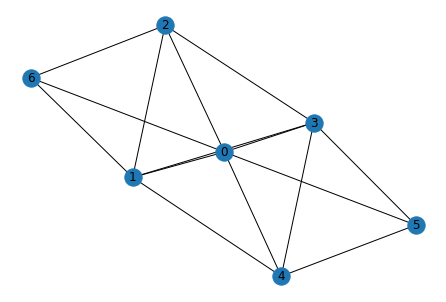

In [686]:
nx.draw(unique_connected_n_graphs[6][52],with_labels=True)
plt.show()
nx.draw(unique_connected_n_graphs[7][489],with_labels=True)

Come back to later! Graphs that pass tests in n+1 vertices can be constructed from graphs on n vertices that pass the tests!

70


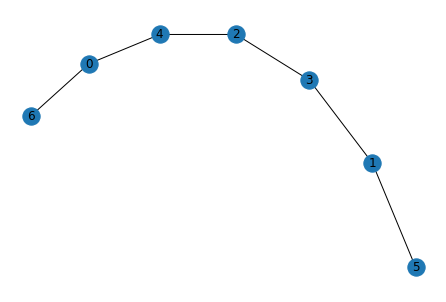

{0: 0.3333333333333333, 1: 0.3333333333333333, 2: 0.6, 3: 0.5333333333333333, 4: 0.5333333333333333, 5: 0.0, 6: 0.0}
72


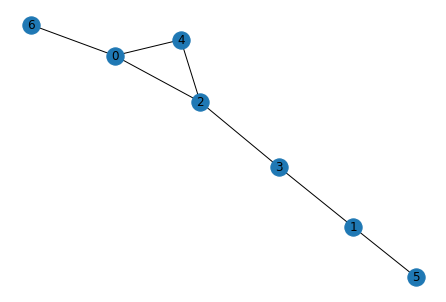

{0: 0.3333333333333333, 1: 0.3333333333333333, 2: 0.6, 3: 0.5333333333333333, 4: 0.0, 5: 0.0, 6: 0.0}
85


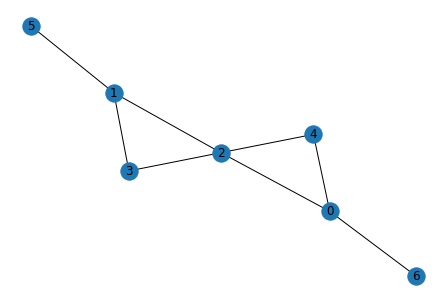

{0: 0.3333333333333333, 1: 0.3333333333333333, 2: 0.6, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0}
179


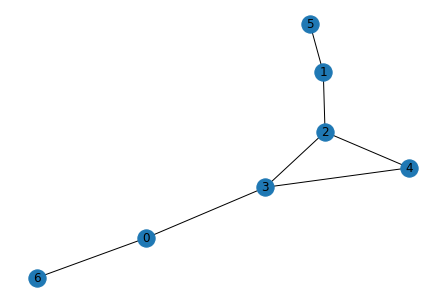

{0: 0.3333333333333333, 1: 0.3333333333333333, 2: 0.5333333333333333, 3: 0.5333333333333333, 4: 0.0, 5: 0.0, 6: 0.0}
187


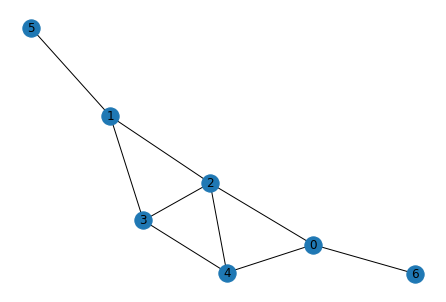

{0: 0.3333333333333333, 1: 0.3333333333333333, 2: 0.4, 3: 0.06666666666666667, 4: 0.06666666666666667, 5: 0.0, 6: 0.0}
240


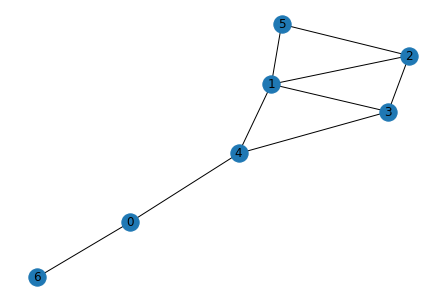

{0: 0.3333333333333333, 1: 0.3333333333333333, 2: 0.03333333333333333, 3: 0.1, 4: 0.5333333333333333, 5: 0.0, 6: 0.0}
244


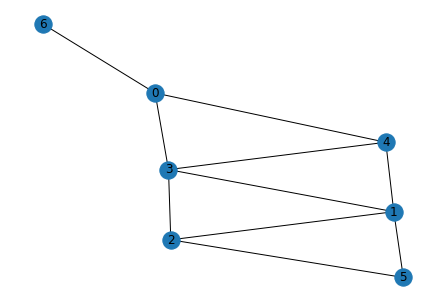

{0: 0.3333333333333333, 1: 0.22222222222222224, 2: 0.07777777777777777, 3: 0.3222222222222222, 4: 0.1111111111111111, 5: 0.0, 6: 0.0}
408


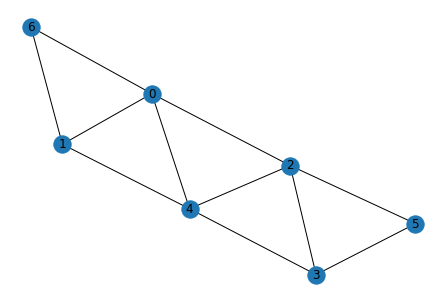

{0: 0.2666666666666666, 1: 0.05555555555555555, 2: 0.2666666666666666, 3: 0.05555555555555555, 4: 0.22222222222222224, 5: 0.0, 6: 0.0}
489


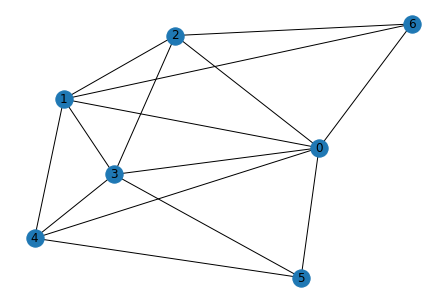

{0: 0.19999999999999996, 1: 0.07777777777777777, 2: 0.02222222222222222, 3: 0.07777777777777777, 4: 0.02222222222222222, 5: 0.0, 6: 0.0}


In [677]:
for i in range(len(unique_connected_n_graphs[7])):
    G=unique_connected_n_graphs[7][i]
    if impermissible_cycles_R1(G) and kiss_test_1(G):
        print(i)
        nx.draw(G,with_labels=True)
        plt.show()
        c_dic=nx.betweenness_centrality(G)
        print(c_dic)
        end_counter=0
        for n in range(7):
            if c_dic[n]==0:
                end_counter+=1
        if end_counter<2:
            print('AHHHHHHHHHHHH!!!!!!!!',end_counter)

Found successfully in 686 tries in 0.7 seconds
Found successfully in 1 dimensions on 3070 tries in 1.6 seconds


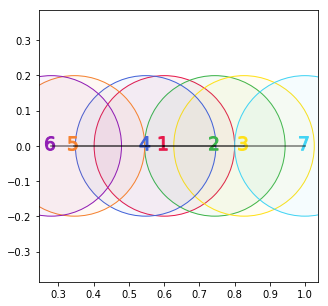

True

In [687]:
test=unique_connected_n_graphs[7][489]
better_randomish_clouds_1(test,fancy=True)
try_random_pt_clouds(test,dim=1,return_cloud=False,patience=10,fancy=True)

In [1049]:
def construct_in_R1(data,return_cloud=False,return_r=False,show=False,test=False):
    if impermissible_cycles_R1(data)==False or kiss_test_1(data)==False:
        return False
    if type(data)==list:
        mtx=reduce_to_adj(data)
        G_0=nx.from_numpy_matrix(mtx)
    if type(data)==np.ndarray:
        mtx=data.copy()
        G_0=nx.from_numpy_matrix(mtx)
    if type(data)==type(nx.complete_graph(1)):
        G_0=data.copy()
    all_nodes=len(G_0.nodes())
    G,condensed_dict=condense(G_0,return_dict=True)
    num_nodes=len(G.nodes())
    if num_nodes<4:
        return True
    cent_dict=nx.betweenness_centrality(G)
    potential_ends=[]
    for n in list(G.nodes()):
        if cent_dict[n]==0:
            potential_ends.append(n)
    if len(potential_ends)<2 and len(G.nodes())>3:
        return 'Problem on potential ends'
    longest_shortest=0
    ends=(0,0)
    for s in combinations(potential_ends,2):
        path_length=nx.shortest_path_length(G,source=s[0], target=s[1])
        if path_length>longest_shortest:
            longest_shortest=path_length
            ends=s
    pt_cloud=np.zeros((all_nodes,1))
    pt_cloud[ends[0],0]=0
    pt_cloud[ends[1],0]=1
    path=nx.shortest_path(G,ends[0],ends[1])
    path_length=len(path)
    for p in range(path_length-1):
        pt_cloud[path[p],0]=p/(path_length-1)
        
    gaps=[[]]
    for j in range((path_length-2)):
        gaps.append([])
    for i in range(path_length-1):
        n1,n2=path[i],path[i+1]
        for n in list(G.nodes()):
            if n not in path:
                if G.has_edge(n,n1) and G.has_edge(n,n2):
                    gaps[i].append(n)
                    
    updated_gaps=copy.deepcopy(gaps)
    for i in range(len(gaps)-1):
        intersection=set(gaps[i]).intersection(gaps[i+1])
        if intersection != set():
            for n in intersection:
                for n1 in gaps[i+1]:
                    if n!=n1 and G.has_edge(n,n1)==False:
                        if n in updated_gaps[i] and n1 in updated_gaps[i]:
                            updated_gaps[i].remove(n)
                            updated_gaps[i].remove(n1)
                        if n in updated_gaps[i+1] and n1 in updated_gaps[i+1]:
                            updated_gaps[i+1].remove(n)
                            updated_gaps[i+1].remove(n1)
    for i in range(len(updated_gaps)):
        in_gap=copy.deepcopy(updated_gaps[i])
        ordered_in_gap=[]
        for n in in_gap:
            if i!=0 and len(updated_gaps[i-1])>0:
                flag=0
                for n1 in updated_gaps[i-1]:
                    if flag==0 and G.has_edge(n,n1)==False:
                        flag=1
                if flag==1:
                    ordered_in_gap.append(n)
            if i!=len(updated_gaps)-1 and len(updated_gaps[i+1])>0:
                flag=0
                for n1 in updated_gaps[i+1]:
                    if flag==0 and G.has_edge(n,n1)==False:
                        flag=1
                if flag==1 and n not in ordered_in_gap:
                    ordered_in_gap.insert(0,n)
            if n not in ordered_in_gap:
                ordered_in_gap.insert(math.floor(len(ordered_in_gap)/2),n)
        if len(ordered_in_gap)!=len(updated_gaps[i]):
            print('Problem with tier two ordering in gap')
        updated_gaps[i]=ordered_in_gap
        p_loc=pt_cloud[path[i],0]
        p1_loc=pt_cloud[path[i+1],0]
        for ind in range(len(updated_gaps[i])):
            n=updated_gaps[i][ind]
            pt_cloud[n,0]=p_loc+(ind+1)*(p1_loc-p_loc)/(len(updated_gaps[i])+1)
    
    for n in list(condensed_dict.keys()):
        pt_cloud[n,0]=pt_cloud[condensed_dict[n],0]
    
    tier_2=[]
    for p in updated_gaps:
        for q in p:
            tier_2.append(q)
    
    if will_unif_rad_work(G_0,pt_cloud)==False:
        epsilon=1/((path_length-1)*num_nodes)
        #if two tier_2 nodes should repel of each other
        for n in range(len(tier_2)):
            for n1 in range(n+1,len(tier_2)):
                if G.has_edge(tier_2[n],tier_2[n1])==False and pt_cloud[tier_2[n1],0]-pt_cloud[tier_2[n],0]<=1/(path_length-1):
                    pt_cloud[tier_2[n],0]-=epsilon
                    pt_cloud[tier_2[n1],0]+=epsilon
        #if a tier_2 node has asymetric ties to the path
        for n in range(len(tier_2)):
            ties_to_path=[]
            for p in range(path_length):
                if G.has_edge(tier_2[n],path[p]):
                    ties_to_path.append(path[p])
            if len(ties_to_path)==3:
                num_p_on_right=0
                for p in ties_to_path:
                    if pt_cloud[p,0]-pt_cloud[tier_2[n],0]>0:
                        num_p_on_right+=1
                if num_p_on_right==2:
                    pt_cloud[tier_2[n],0]+=epsilon
                else:
                    pt_cloud[tier_2[n],0]-=epsilon
    
    for n in list(condensed_dict.keys()):
        pt_cloud[n,0]=pt_cloud[condensed_dict[n],0]
    
    if will_unif_rad_work(G_0,pt_cloud)==False:
        print('Error, could not make it work')
        return False
    
    if show:
        d=will_unif_rad_work(G_0,pt_cloud)
        r=d/2
        x_list=list(pt_cloud[:,0])
        y_list=[0]*len(x_list)
        plt.figure(figsize=(10,5))
        plt.axis('equal')
        for i in range(len(x_list)): #changing i vs. i+1 depending on the situation
            plt.plot(x_list[i],y_list[i],marker=TextPath((-4,-2), str(i+1)),markersize=20,color=color_list[i%20],label=i+1)
        ax=plt.gca()
        for i in range(len(x_list)):
            c=plt.Circle((x_list[i],y_list[i]), r,color=color_list[i%20], fill=True, alpha=0.05)
            ax.add_artist(c)
            c=plt.Circle((x_list[i],y_list[i]), r,color=color_list[i%20], fill=False)
            ax.add_artist(c)
        plt.show()
        for n in list(condensed_dict.keys()):
            print('Note that node %i is stacked on top of node %i' %(n+1,condensed_dict[n]+1))

    if return_cloud:
        if return_r:
            return pt_cloud,r
        else:
            return pt_cloud
    if return_r:
        return r
    if test:
        return True

70


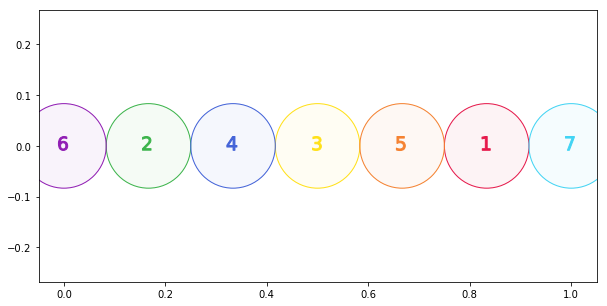

72


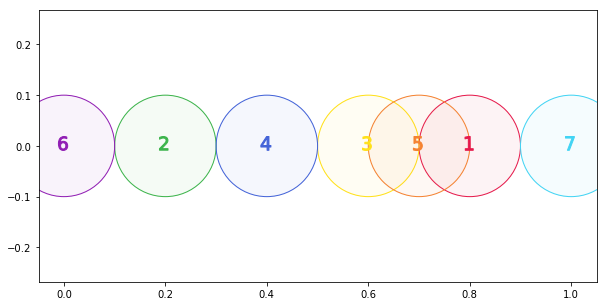

85


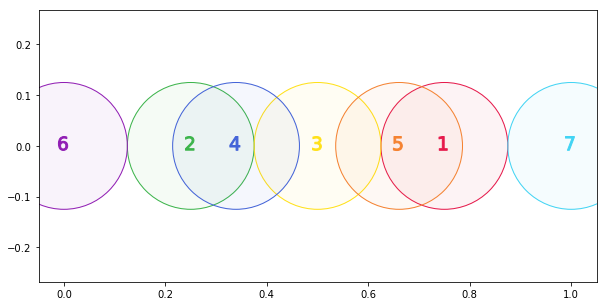

179


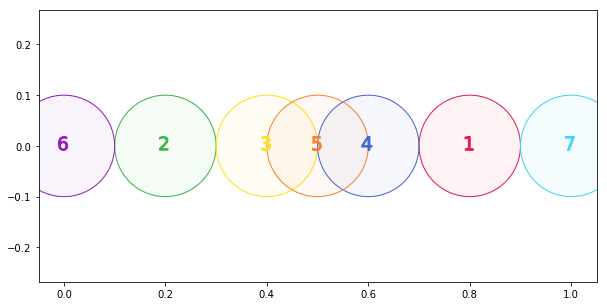

187


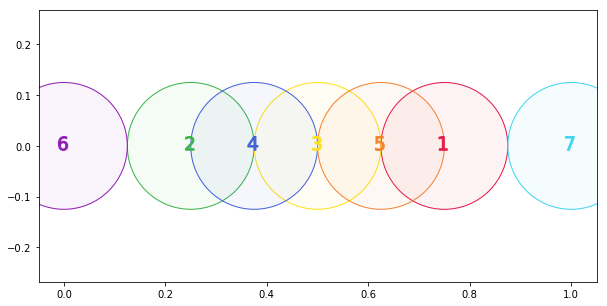

240


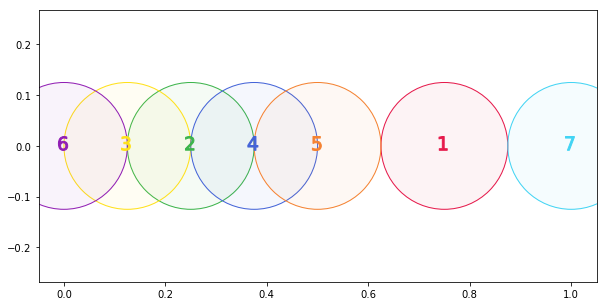

244


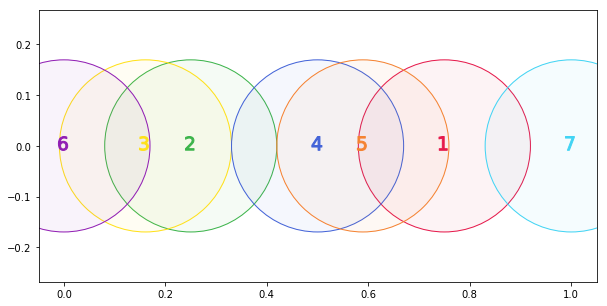

408


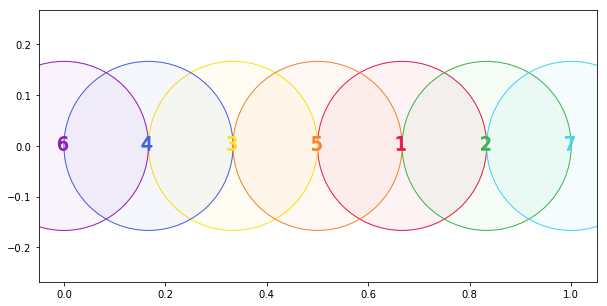

489


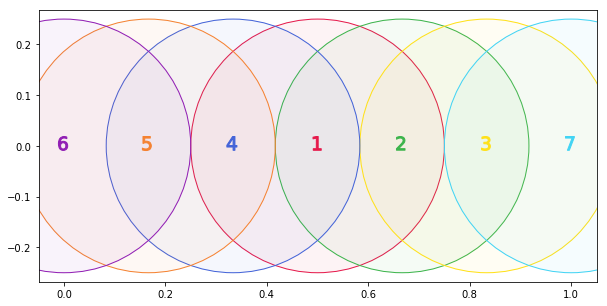

In [1046]:
for q in [70,72,85,179,187,240,244,408,489]:
    print(q)
    construct_in_R1(unique_connected_n_graphs[7][q],show=True)

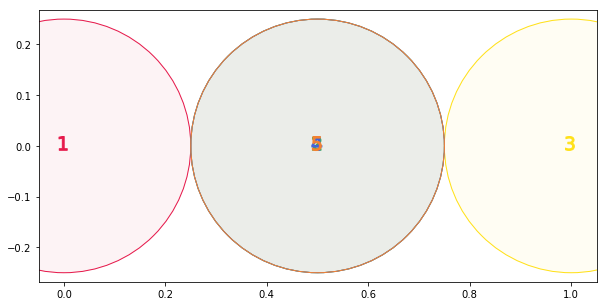

Note that node 4 is stacked on top of node 2
Note that node 5 is stacked on top of node 2


In [1036]:
construct_in_R1([[1,2,3,4,2,4,1,5,2,5,3,5,4]],show=True)

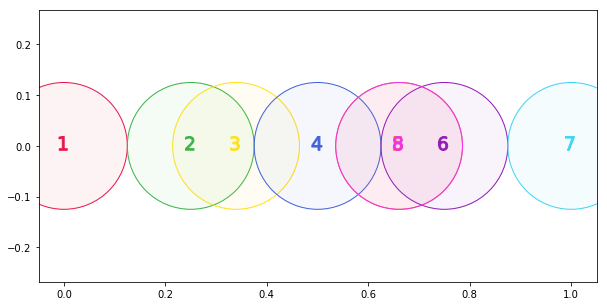

Note that node 8 is stacked on top of node 5


In [1035]:
ex=[[1,2,3,4,2,4,5,8,4,6,5,6,8,6,7]]
construct_in_R1(ex,show=True)

In [1054]:
unique_connected_n_graphs=[[nx.empty_graph()],[nx.complete_graph(1)],[nx.complete_graph(2)],
                           [nx.complete_graph(3)],unique_connected_4_graphs,unique_connected_5_graphs,
                           unique_connected_6_graphs,unique_connected_7_graphs]

In [1055]:
start=time.time()
condensed_constructible_n_graphs=[[]]
for i in range(7):
    condensed_constructible_n_graphs.append([])
for n in range(8):
    g_list=unique_connected_n_graphs[n]
    for G in g_list:
        if construct_in_R1(G,test=True):
            condensed_constructible_n_graphs[n].append(G)
print(time.time()-start, 'seconds')

1.1397991180419922 seconds


In [1059]:
for i in range(8):
    print(i,int(2**((i**2-i)/2)),len(unique_connected_n_graphs[i]),len(condensed_constructible_n_graphs[i]))

0 1 1 1
1 1 1 1
2 2 1 1
3 8 1 1
4 64 3 1
5 1024 11 3
6 32768 61 4
7 2097152 507 9


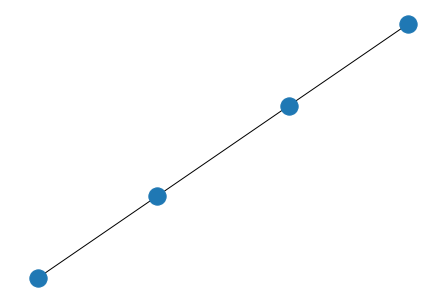

In [1066]:
nx.draw(condensed_constructible_n_graphs[4][0])

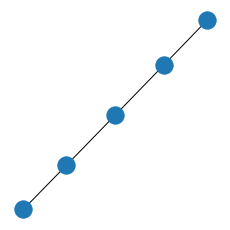

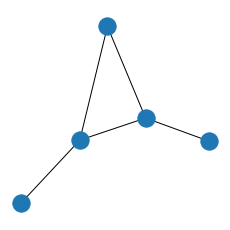

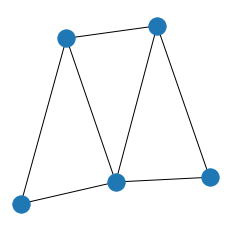

In [1069]:
for G in condensed_constructible_n_graphs[5]:
    plt.figure(figsize=(3,3))
    nx.draw(G)
    plt.show()

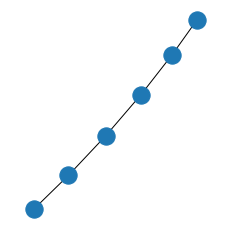

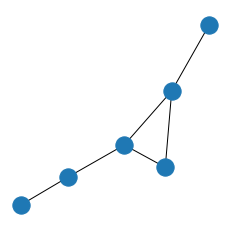

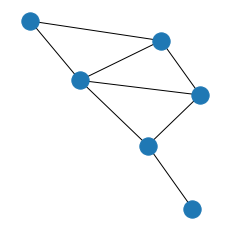

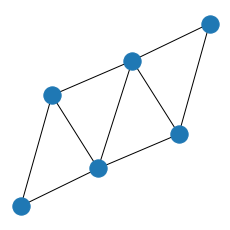

In [1070]:
for G in condensed_constructible_n_graphs[6]:
    plt.figure(figsize=(3,3))
    nx.draw(G)
    plt.show()

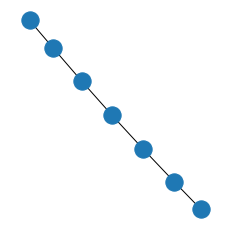

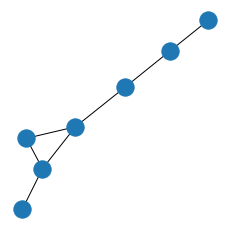

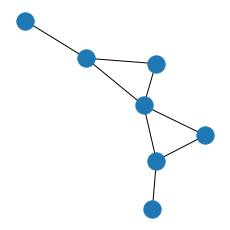

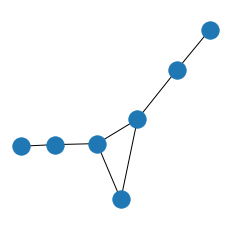

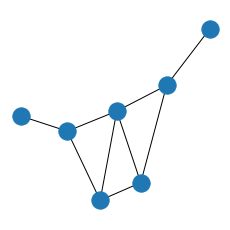

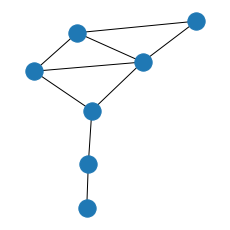

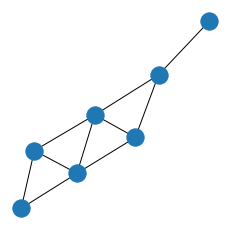

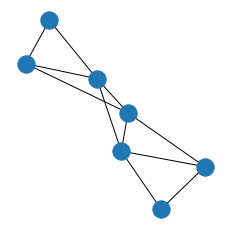

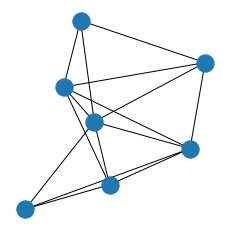

In [1071]:
for G in condensed_constructible_n_graphs[7]:
    plt.figure(figsize=(3,3))
    nx.draw(G)
    plt.show()

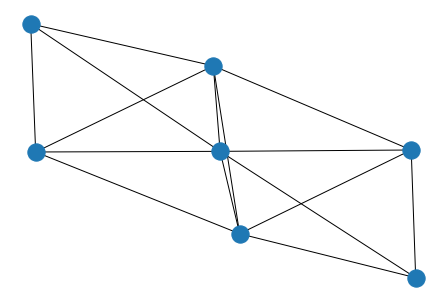

In [1077]:
nx.draw(condensed_constructible_n_graphs[7][8])

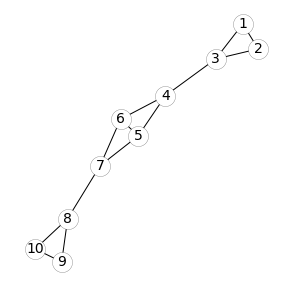

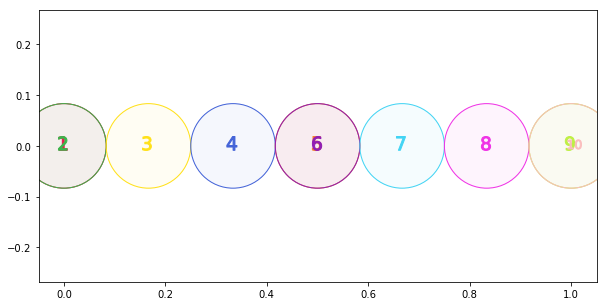

Note that node 2 is stacked on top of node 1
Note that node 6 is stacked on top of node 5
Note that node 10 is stacked on top of node 9


In [1063]:
ex=[[1,2,3,1,3,4,5,6,4,6,7,5,7,8,9,10,8]]
graph(ex)
construct_in_R1(ex,show=True)

[[2, 4, 1, 2, 1, 4, 5, 3, 2, 3, 1, 4, 5, 1, 1]]
     1    2    3    4    5
1  0.0  1.0  1.0  1.0  1.0
2  1.0  0.0  1.0  1.0  0.0
3  1.0  1.0  0.0  0.0  1.0
4  1.0  1.0  0.0  0.0  1.0
5  1.0  0.0  1.0  1.0  0.0


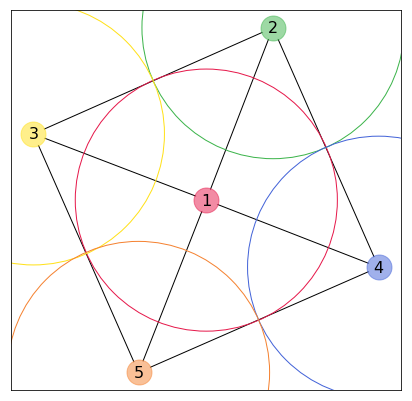

[2, 4, 5, 3] forms an impermissible cycle


False

In [127]:
pyramid=[[2, 4, 1, 2, 1, 4, 5, 3, 2, 3, 1, 4, 5, 1, 1]]
print(pyramid)
print(show_adj(pyramid))
graph_with_unif_rad(pyramid)
impermissible_cycles_R1(pyramid,prt=True)

In [746]:
uncaught_G=nx.from_numpy_matrix(reduce_to_adj(uncaught_list[0]))
nx.cycle_basis(uncaught_G)

[[2, 4, 0], [3, 4, 0], [1, 3, 0], [1, 2, 0]]

this has a four-cycle, but it passes the test because the basis is made of three cycles... hmmm

In [665]:
P_3_seq=[[1,2,3,4,5,1,6,2,5,3,6,4,1]]
show_adj(P_3_seq)

,1,2,3,4,5,6
1,0.0,1.0,0.0,1.0,1.0,1.0
2,1.0,0.0,1.0,0.0,1.0,1.0
3,0.0,1.0,0.0,1.0,1.0,1.0
4,1.0,0.0,1.0,0.0,1.0,1.0
5,1.0,1.0,1.0,1.0,0.0,0.0
6,1.0,1.0,1.0,1.0,0.0,0.0


In [666]:
try_random_pt_clouds(P_3_seq,dim=2,return_cloud=False,patience=10,fancy=True)

Tried 30918 times in 2 dimensions and got nothing, sorry :(


False

In [667]:
P_3_G=nx.from_numpy_matrix(reduce_to_adj(P_3_seq))
nx.cycle_basis(P_3_G)

[[1, 5, 0],
 [3, 5, 0],
 [1, 2, 5],
 [3, 2, 5],
 [4, 2, 5, 0],
 [1, 4, 0],
 [3, 4, 0]]

In [12]:
def plot_diagms(filt_or_cloud, degree_list, dtype='filt', max_dist=10,new_fig=True, optional_title=False, label=None):
    if dtype=='filt':
        hom = d.homology_persistence(filt_or_cloud)
        dgms = d.init_diagrams(hom, filt_or_cloud)
    if dtype=='cloud':
        compressed_pts=scipy.spatial.distance.pdist(filt_or_cloud)
        filtration=d.fill_rips(compressed_pts, max(degree_list)+1, max_dist)
        hom = d.homology_persistence(filtration)
        dgms = d.init_diagrams(hom, filtration)
    
    if new_fig:
        plt.figure(figsize=(8,8))
    
    plt.xlabel('Birth')
    plt.ylabel('Death')
    
    if optional_title==False:
        plt.title('Persistence Diagram')
    else:
        plt.title('Persistence Diagram for H_%i' %optional_title)
    
    longest_death=0
    earliest_birth=10**32
    latest_birth=0
    for degree in degree_list:
        dgm=dgms[degree]
        
        finite_death=False
        
        for point in dgm:
            if point.death != float('inf') and point.death>longest_death:
                longest_death=point.death
                finite_death=True
            if point.birth > latest_birth:
                latest_birth=point.birth
            if point.birth < earliest_birth:
                earliest_birth=point.birth
        longest_death=longest_death*1.02
        if finite_death==False:
            longest_death=latest_birth
        
        points=[]
        inf_points=[]
    
        for point in dgm:
            if point.death != float('inf'):
                points.append([point.birth,point.death])
            else:
                inf_points.append([point.birth,longest_death])
    
        if len(points)+len(inf_points)==0:
            #print('No H_%i' %degree)
            if label!=None:
                plt.scatter([0],[0], marker='P', label=round(label,2))
            else:
                plt.scatter([0],[0], marker='P',label=degree, color=color_list[degree])
            
        else:
            if label!=None:
                plt.scatter([item[0] for item in points],[item[1] for item in points], marker='o', label=round(label,2))
            else:
                plt.scatter([item[0] for item in points],[item[1] for item in points], marker='o',label=degree, color=color_list[degree])
            if new_fig:
                plt.scatter([item[0] for item in inf_points],[item[1] for item in inf_points], marker='x',label=degree, color=color_list[degree])    
    
    plt.plot([0,longest_death],[0,longest_death], c='k', linewidth=0.5)
    plt.legend(loc=4)
        
    if new_fig:
        plt.show()

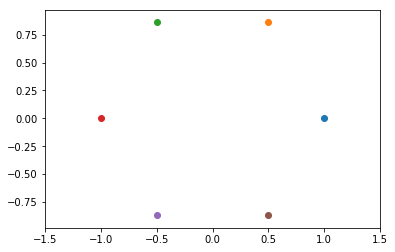

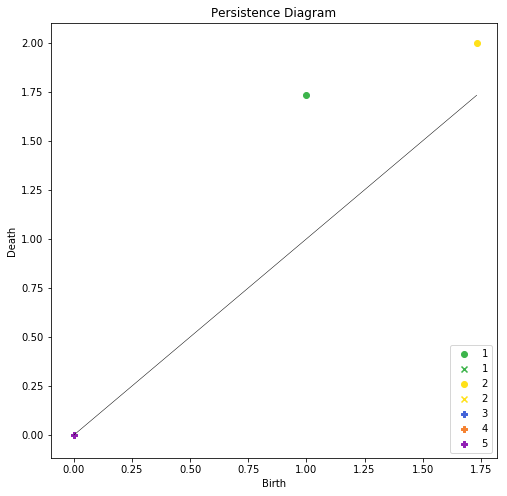

In [23]:
n=6
n_gon=np.zeros((0,3))
for t in range(n):
    n_gon=np.vstack((n_gon,np.array([math.cos(2*math.pi/n*t),math.sin(2*math.pi/n*t),0])))
    
n_gon
for t in range(n):
    plt.scatter(n_gon[t,0],n_gon[t,1])
    plt.axis('equal')
plt.show()
plot_diagms(n_gon, [1,2,3,4,5], dtype='cloud', max_dist=10,new_fig=True)